In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [28]:
def map_feature(x1, x2):

    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 2
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

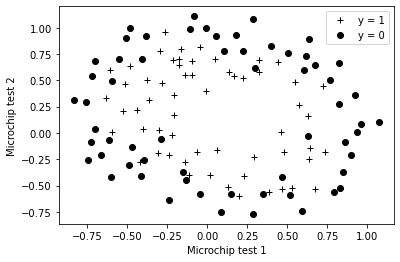

In [29]:
x1_raw, x2_raw, y = np.loadtxt("ex2data2.txt", dtype=np.float64, delimiter=",", unpack=True)

%matplotlib inline

x = map_feature(x1_raw, x2_raw)

def plotRawData(x, y):
    pos = np.argwhere(y == 1)
    neg = np.argwhere(y == 0)
    plt.figure()
    ax1 = plt.plot(x[pos, 1], x[pos, 2], "k+", label="y = 1")
    ax1 = plt.plot(x[neg, 1], x[neg, 2], "ko", label="y = 0")
    ax1 = plt.legend()
    ax1 = plt.xlabel("Microchip test 1")
    ax1 = plt.ylabel("Microchip test 2")
    plt.show()


plotRawData(x, y)

In [30]:
def sigmoid(z):
    g = np.zeros(np.size(z))
    g = 1/(1 + np.exp(-z))
    return g

In [31]:
def costFunction(theta, x, y, lam):
    m = np.size(y)
    J = 0
    h = sigmoid(x @ theta)
    theta_1 = np.hstack((0, theta[1:]))
    p = lam * (theta_1.T @ theta_1)/(2 * m)
    J = ((-y).T @ np.log(h) - (1 - y).T @ np.log(1 - h))/m + p
    return J

In [32]:
def grad(theta, x, y ,lam):
    m = np.size(y)
    grad = np.zeros_like(theta)
    h = sigmoid(x @ theta)
    theta_1 = np.hstack((0, theta[1:]))
    error = h - y
    grad = (x.T @ (h - y) + lam * theta_1)/m
    return grad

In [33]:
test_theta = np.zeros(x[0,:].size, )
lam = 1.0
J_test= costFunction(test_theta, x, y, lam)
grad_test = grad(test_theta, x, y, lam)

In [34]:
print("J = {} \n\ngrad = {}".format(J_test, grad_test))

J = 0.6931471805599453 

grad = [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02]


In [35]:
import scipy.optimize as opt

theta = np.zeros(x[0,:].size,)

results = opt.fmin_bfgs(costFunction, x0=theta, fprime=grad, args=(x,y,lam))
print("Results = {}".format(results))
print("Cost = {}".format(costFunction(results, x, y, lam)))

Optimization terminated successfully.
         Current function value: 0.582863
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Results = [ 1.19946657  0.35015739  0.67136678 -2.78154468 -0.95692974 -2.39044167]
Cost = 0.582863120363935


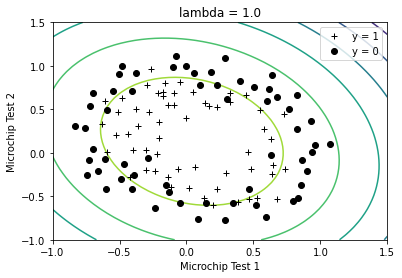

In [36]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((u.size, v.size))
for i in range(u.size):
    for j in range(v.size):
        z[i, j] = (map_feature(np.array(u[i]), np.array(v[j])) @ results)

U, V = np.meshgrid(u, v)
z = z.T

#print(z)

pos = np.argwhere(y == 1)
neg = np.argwhere(y == 0)
fig = plt.figure()


ax2 = plt.plot(x[pos, 1], x[pos, 2], "k+", label="y = 1")
ax2 = plt.plot(x[neg, 1], x[neg, 2], "ko", label="y = 0")

ax2 = plt.contour(U, V, z)
ax2 = plt.xlabel("Microchip test 1")
ax2 = plt.ylabel("Microchip test 2")
ax2 = plt.title('lambda = {}'.format(lam))
ax2 = plt.xlabel('Microchip Test 1')
ax2 = plt.ylabel('Microchip Test 2')
ax2 = plt.legend(['y = 1', 'y = 0', 'Decision boundary'])

ax2 = plt.show()